<a href="https://colab.research.google.com/github/Yatagarasu50469/Guided-Filteration/blob/master/programming_assignment2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import cv2
import scipy
import skimage
from skimage import feature
from skimage import filters
from skimage.filters import *
import numpy as np

!wget https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg

--2021-09-27 19:53:24--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg’

Marquette.jpg       100%[===================>] 471.02K  --.-KB/s    in 0.006s  

2021-09-27 19:53:24 (81.6 MB/s) - ‘Marquette.jpg’ saved [482326/482326]



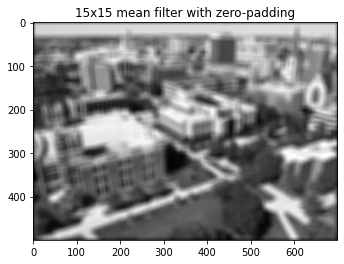

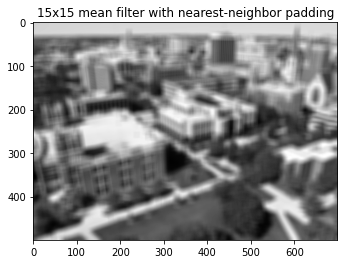

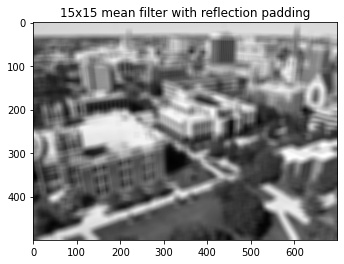

In [5]:
# Convolve the image `Marquette.jpg' with a 15x15 mean filter using the following padding strategies: 
#Zero padding, Nearest neighbor, reflect. Visually compare the results.

img = cv2.imread('Marquette.jpg',0)
kernel = np.ones((15,15))/15**2
result = scipy.ndimage.filters.convolve(img,kernel,mode='constant', cval=0.0)
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with zero-padding')
plt.show()

result = scipy.ndimage.filters.convolve(img,kernel,mode='nearest')
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with nearest-neighbor padding')
plt.show()

result = scipy.ndimage.filters.convolve(img,kernel,mode='reflect')
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with reflection padding')
plt.show()



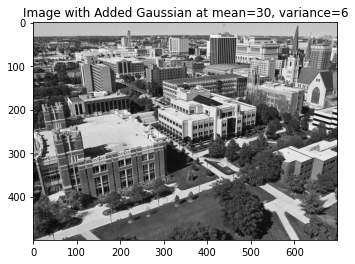

In [61]:
# Create a numpy array with the same size as the image `Marquette.jpg' containing Gaussian noise with 
#mean 30 and variance 6 and add the two images (make sure the pixels in the resulting image are in the 
#range [0, 255])
img = cv2.imread('Marquette.jpg',0)
mean = 30
var = 6
sigma = var**0.5
gaussNoise = np.random.normal(mean, sigma, img.shape)
noisy_img = np.add(img, gaussNoise)
noisy_img = ((noisy_img/np.max(noisy_img))*255).astype('uint8')

plt.imshow(noisy_img,cmap='gray')
plt.title('Image with Added Gaussian at mean=30, variance=6')
plt.show()


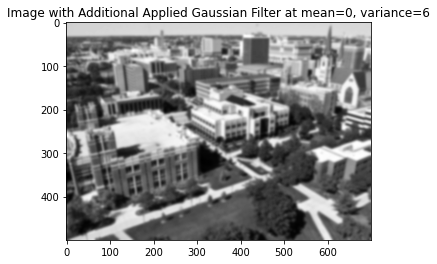

In [62]:
# Apply a Gaussian filter with mean 0 and variance 6 to the image and display the resulting image.
var=6
sigma = var**0.5
noisy_img = scipy.ndimage.gaussian_filter(noisy_img, sigma)
plt.imshow(noisy_img,cmap='gray')
plt.title('Image with Additional Applied Gaussian Filter at mean=0, variance=6')
plt.show()



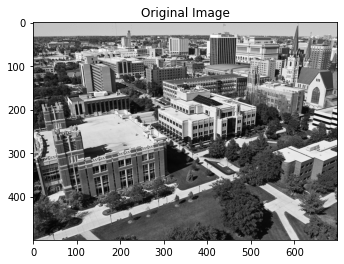

RuntimeError: ignored

In [69]:
# Apply a mean filter to the image corrupted with noise. Experiment with the filter size to optimize the results.
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()
plt.close()
mChoices = range(1, 25)

results, differences = [], []
for m in mChoices:
  kernel = np.ones((m,m))/m**2
  result = scipy.ndimage.filters.convolve(noisy_img,kernel,mode='reflect')
  results.append(result)
  differences.append(np.sum(abs(result-img)))
best_m = mChoices[np.argmin(differences)]
plt.imshow(result,cmap='gray')
plt.title('Optimized mean filter with m='+str(best_m)+' to remove noise from image')
plt.show()




0

In [ ]:
# Create a numpy array with the same size as the image `Marquette.jpg' containing impulse noise where 
#the probability that a pixel is corrupted is 10% and add the two images (make sure the pixels in the 
#resulting image are in the range [0, 255])

img = cv2.imread('Marquette.jpg',0)
impulseImage = np.zeros((img.shape))

#Apply 255 randomly 10%
corruptedImage = np.add(impulseImage,img)

In [ ]:
# Apply a mean filter to the image corrupted with noise. Experiment with the filter size to optimize the results.

m=15
kernel = np.ones((m,m))/m**2
result = scipy.ndimage.filters.convolve(corruptedImage, kernel)
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with zero-padding')
plt.show()



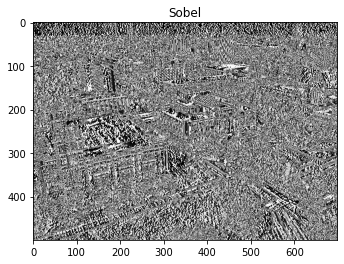

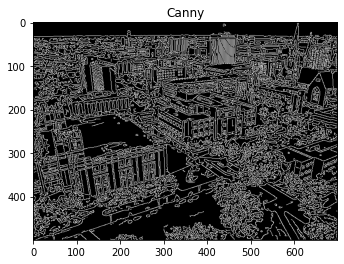

In [31]:
# Apply the Sobel edge detector and the Canny edge detector to the image `Marquette.jpg' and visually 
#compare the results.

img = cv2.imread('Marquette.jpg',0)

sobelImage = scipy.ndimage.filters.sobel(img, mode='constant', cval=0.0)
cannyImage = skimage.feature.canny(img)

plt.imshow(sobelImage, cmap='gray')
plt.title('Sobel')
plt.show()
plt.close()

plt.imshow(cannyImage, cmap='gray')
plt.title('Canny')
plt.show()
plt.close()